# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Bagus Tegar Zahir Afif
- **Email:** btzabagus2@gmail.com
- **ID Dicoding:** bagus_tegar

## Menentukan Pertanyaan Bisnis

- Bagaimana pola peminjaman sepeda pada weekdays dan weekend?
- Bagaimana pola peminjaman sepeda berdasarkan jam pada tiap-tiap hari?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset didapatkan dengan baik

### Assessing Data

Pengecekan nilai kosong dengan `isnull()`

In [8]:
print(day_df.isnull().values.any())
print(hour_df.isnull().values.any())

False
False


- Dataset tidak memiliki kolom kosong karena yang dikembalikan adalah False

#### Pengecekan tabel `day.csv`

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pengecekan kolom duplikasi

In [10]:
print(day_df.duplicated().any())

False


In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Pengecekan tabel `hour.csv`

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pengecekan kolom duplikasi

In [13]:
print(hour_df.duplicated().any())

False


In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada kolom kosong (missing value) pada kedua tabel
- Tidak ada duplicated value pada kedua tabel

### Cleaning Data

In [15]:
day_df_cleaned = day_df.drop(columns=['instant'])
hour_df_cleaned = hour_df.drop(columns=['instant'])

**Insight:**
- Menghapus kolom instant karena kolom instant tidak diperlukan untuk EDA (hanyalah urutan peminjaman sepeda)

## Exploratory Data Analysis (EDA)

### Explore `day_df_cleaned` dan `hour_df_cleaned`

In [16]:
day_df_cleaned.sample(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
651,2012-10-13,4,1,10,0,6,0,1,0.393333,0.391396,0.494583,0.146142,2252,4857,7109
401,2012-02-06,1,1,2,0,1,1,1,0.282609,0.296426,0.622174,0.153800,206,3578,3784
668,2012-10-30,4,1,10,0,2,1,2,0.318182,0.309909,0.825455,0.213009,87,1009,1096
442,2012-03-18,1,1,3,0,0,0,2,0.472500,0.464000,0.810000,0.126883,2207,3685,5892
34,2011-02-04,1,0,2,0,5,1,2,0.211304,0.228587,0.585217,0.127839,88,1620,1708
309,2011-11-06,4,0,11,0,0,0,1,0.348333,0.362358,0.734583,0.092054,952,2697,3649
722,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787
212,2011-08-01,3,0,8,0,1,1,1,0.771667,0.703292,0.550833,0.156717,729,3537,4266
686,2012-11-17,4,1,11,0,6,0,1,0.325000,0.326383,0.545417,0.179729,1313,4316,5629
196,2011-07-16,3,0,7,0,6,0,1,0.686667,0.638263,0.585000,0.208342,2418,3505,5923


In [17]:
hour_df_cleaned.sample(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16937,2012-12-13,4,1,12,12,0,4,1,1,0.36,0.3333,0.40,0.2537,30,252,282
13244,2012-07-11,3,1,7,1,0,3,1,1,0.64,0.5758,0.89,0.0000,3,11,14
10245,2012-03-07,1,1,3,23,0,3,1,1,0.44,0.4394,0.62,0.3284,4,58,62
2239,2011-04-08,2,0,4,4,0,5,1,2,0.34,0.3333,0.86,0.1343,0,1,1
2977,2011-05-08,2,0,5,23,0,0,0,1,0.46,0.4545,0.88,0.0896,9,41,50
17316,2012-12-29,1,1,12,9,0,6,0,2,0.26,0.2424,0.81,0.0000,16,33,49
14379,2012-08-27,3,1,8,8,0,1,1,1,0.66,0.6061,0.83,0.0896,29,670,699
12186,2012-05-27,2,1,5,23,0,0,0,3,0.62,0.5758,0.83,0.1343,31,65,96
12925,2012-06-27,3,1,6,18,0,3,1,1,0.80,0.6970,0.27,0.3284,85,719,804
14831,2012-09-15,3,1,9,4,0,6,0,2,0.60,0.5909,0.69,0.3582,3,3,6


In [18]:
day_df_cleaned.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [19]:
hour_df_cleaned.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Tabel peminjaman sepeda berdasarkan hari 

In [20]:
weekday_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Mengelompokkan data berdasarkan weekday dan menghitung rata-rata peminjaman (cnt)
weekday_avg = day_df.groupby('weekday')['cnt'].mean()

# Mengubah weekday menjadi label hari
weekday_avg.index = [weekday_labels[i] for i in weekday_avg.index]

# Menampilkan tabel rata-rata peminjaman harian
weekday_avg_df = pd.DataFrame(weekday_avg).reset_index()
weekday_avg_df.columns = ['Weekday', 'Average Bike Rentals']
print(weekday_avg_df)

     Weekday  Average Bike Rentals
0     Sunday           4228.828571
1     Monday           4338.123810
2    Tuesday           4510.663462
3  Wednesday           4548.538462
4   Thursday           4667.259615
5     Friday           4690.288462
6   Saturday           4550.542857


Tabel peminjaman sepeda berdasarkan jam pada tiap-tiap hari

In [21]:
# Mengelompokkan data berdasarkan jam (hr) dan menghitung rata-rata peminjaman (cnt)
hour_avg = hour_df.groupby('hr')['cnt'].mean()

# Menampilkan tabel rata-rata peminjaman berdasarkan jam
hour_avg_df = pd.DataFrame(hour_avg).reset_index()
hour_avg_df.columns = ['Hour', 'Average Bike Rentals']
print(hour_avg_df)


    Hour  Average Bike Rentals
0      0             53.898072
1      1             33.375691
2      2             22.869930
3      3             11.727403
4      4              6.352941
5      5             19.889819
6      6             76.044138
7      7            212.064649
8      8            359.011004
9      9            219.309491
10    10            173.668501
11    11            208.143054
12    12            253.315934
13    13            253.661180
14    14            240.949246
15    15            251.233196
16    16            311.983562
17    17            461.452055
18    18            425.510989
19    19            311.523352
20    20            226.030220
21    21            172.314560
22    22            131.335165
23    23             87.831044


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola peminjaman sepeda pada weekdays dan weekend?

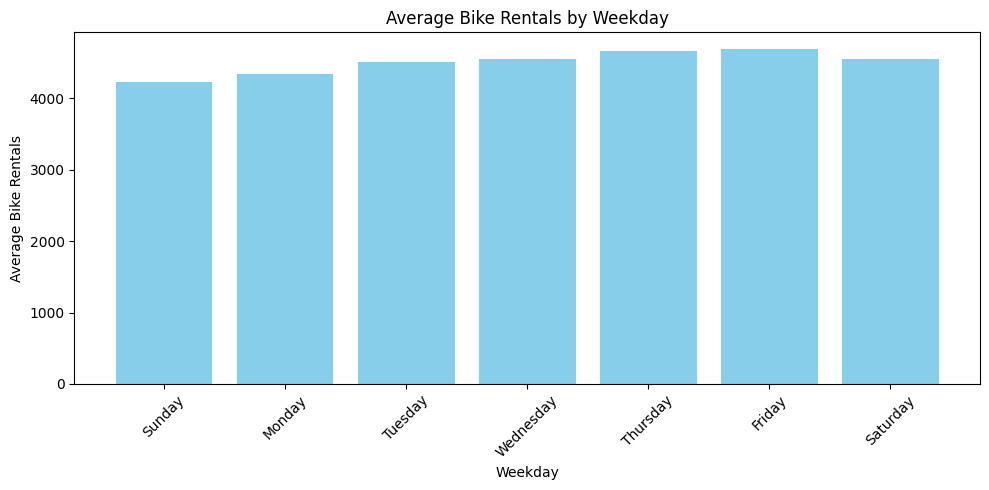

In [22]:
plt.figure(figsize=(10, 5))
plt.bar(weekday_avg_df['Weekday'], weekday_avg_df['Average Bike Rentals'], color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals by Weekday')
plt.xticks(rotation=45)
plt.tight_layout()

**Insight:**
- Bisa kita lihat dari bar chart di atas bahwa pola peminjamannya adalah: Peminjaman terus meningkat dari senin sampai jumat, namun turun lagi pada sabtu dan minggu.
- Peminjam cenderung lebih banyak meminjam sepeda pada Weekdays daripada Weekend.

### Pertanyaan 2: Bagaimana pola peminjaman sepeda berdasarkan jam pada tiap-tiap hari?

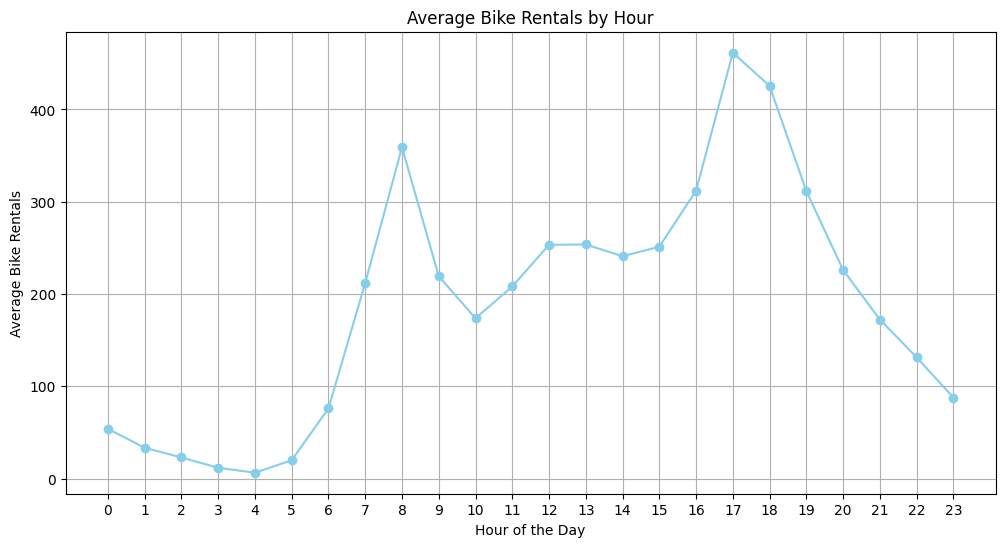

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(hour_avg_df['Hour'], hour_avg_df['Average Bike Rentals'], marker='o', color='skyblue')
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.show()

**Insight:**
- Pada line chart di atas, terbukti bahwa peminjaman sepeda mulai naik dari pukul 6 pagi hingga 8 pagi (jam-jam istirahat pagi). Lalu menurun lagi dan akan memuncak pada pukul 5 sore (jam pulang kerja)

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1 : Peminjaman sepeda cenderung lebih banyak pada hari-hari weekdays dan terus meningkat dari senin-jumat, lalu mengalami penurunan pada sabtu dan minggu.
- Conclution pertanyaan 2 : Rata-rata peminjaman sepeda banyak dilakukan pada waktu olahraga pagi yang mulai meningkat dari pukul 6 pagi dan tren pada 8 pagi, kemudian memuncak pada pukul 5 sore yang di mana adalah jam pulang kerja.